Model the window correction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft
from   glob import glob

In [12]:
#randoms = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits', lower=True)
randoms = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_100k.ran.fits', lower=True)
randoms.dtype.names

('ra',
 'dec',
 'z',
 'weight_fkp',
 'weight_systot',
 'weight_cp',
 'weight_noz',
 'nz')

(array([ 6685.,  8750., 10256., 11956., 11618., 11460., 11528., 10734.,
         9228.,  7785.]),
 array([0.80002975, 0.94002538, 1.08002101, 1.22001664, 1.36001227,
        1.5000079 , 1.64000353, 1.77999916, 1.91999479, 2.05999042,
        2.19998605]),
 <a list of 10 Patch objects>)

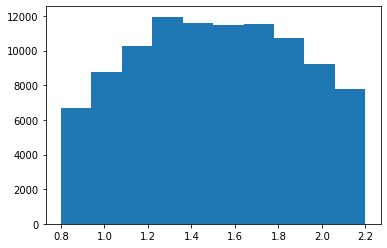

In [22]:
plt.hist(randoms['z'])

In [13]:
# randoms = np.random.choice(randoms, size=10000, replace=False)

In [4]:
import nbodykit.lab as nb

In [5]:
from time import time

In [14]:
randoms = nb.ArrayCatalog(randoms)

In [15]:
randoms.columns

['Selection',
 'Value',
 'Weight',
 'dec',
 'nz',
 'ra',
 'weight_cp',
 'weight_fkp',
 'weight_noz',
 'weight_systot',
 'z']

In [16]:
randoms['Weight'] = randoms['weight_cp']*randoms['weight_noz']*randoms['weight_systot']*randoms['weight_fkp']

In [17]:
randoms.size

100000

In [18]:
def run():
    t0 = time()    
    edges = np.logspace(np.log10(0.1), np.log10(5000.0), 100)
    # edges = np.linspace(0.001, 5000.0, 100)
    cosmo = nb.cosmology.Planck15
    RR    = nb.SurveyDataPairCount('2d', randoms, edges, Nmu=20, cosmo=cosmo, 
                                   ra='ra', dec='dec', redshift='z', weight='Weight',
                                   show_progress=1)
    print('took {} sec'.format(time()-t0))
    return RR

In [19]:
RR = run()

took 266.39410305023193 sec


In [29]:
RR.save('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_100k.RR.ran.json')

Text(0.5, 0, 'r')

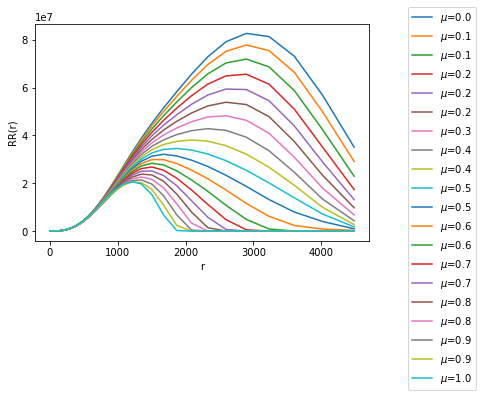

In [20]:
for j, mu_j in enumerate(RR.pairs.edges['mu'][:-1]):
    #print(j)
    plt.plot(RR.pairs.edges['r'][:-1], RR.pairs['wnpairs'][:, j], label=r'$\mu$=%.1f'%mu_j)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('RR(r)')
plt.xlabel('r')

In [23]:
from scipy.special import legendre

In [24]:
def RR_to_ell(RR, mu_bins, ell):
    mu_mid = 0.5*(mu_bins[:-1]+mu_bins[1:])
    legendre_pol = (2*ell+1.)*legendre(ell)(mu_mid)
    mu_diff = np.diff(mu_bins) 
    RR_ell = np.sum(RR * legendre_pol * mu_diff, axis=1) / np.sum(mu_bins)
    return RR_ell    

0.0
0.0
0.0


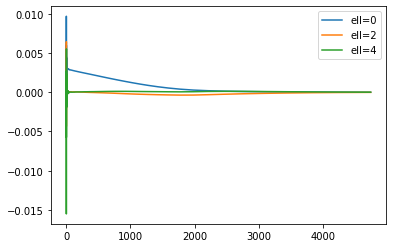

In [27]:
for ell in [0, 2, 4]:
    x   = RR.pairs.edges['r']
    y   = RR_to_ell(RR.pairs['wnpairs'], RR.pairs.edges['mu'], ell)
    dx  = np.diff(x)
    xc  = 0.5*(x[1:]+x[:-1])
    vol = 4*np.pi*xc**2*dx    
    y  /= vol
    print(y[0])
    plt.plot(xc, y, label='ell=%d'%ell)
plt.legend()
# plt.xscale('log')
# plt.xlim(xmin=1)

Use SurveyDataPairCount and use Nmu= 100
Inside this SurveyDataPairCount, modify the option for 1d.
And made mode 2d

Make your code so that it addes all different mu bins aftermultiply with Legendre_ell(mu)


In [77]:
edges = np.logspace(np.log10(0.1), np.log10(5000.0), 100)
# edges = np.linspace(0.001, 5000.0, 100)
cosmo = nb.cosmology.Planck15
RR1d    = nb.SurveyDataPairCount('1d', randoms, edges, cosmo=cosmo, 
                               ra='ra', dec='dec', redshift='z', weight='Weight',
                               show_progress=True)

(1, 7657.393122730506)

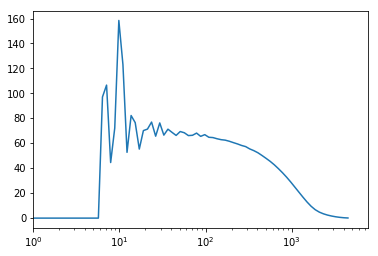

In [86]:
dr = np.diff(edges)
plt.plot(edges[:-1], RR1d.pairs['wnpairs']/ ((4*np.pi*edges[:-1]**2*dr)))
plt.xscale('log')
plt.xlim(xmin=1)

## Florian window

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [31]:
d = np.loadtxt('/Volumes/TimeMachine/data/eboss/v6/win_eBOSS_DR16_QSO_v6_NGC_TSC_600_600_600_10000_merged.dat', skiprows=30)

In [33]:
len(d[0])

18

In [34]:
d.shape

(10000, 18)

In [40]:
lbls = 'W^0_0(k) W^0_1(k) W^0_2(k) W^0_3(k) W^0_4(k) W^1_0(k) W^1_1(k) W^1_2(k) W^1_3(k) W^1_4(k) W^2_0(k) W^2_1(k) W^2_2(k) W^2_3(k) W^2_4(k) Nmodes'
tlb = lbls.split(' ')
tlb

['W^0_0(k)',
 'W^0_1(k)',
 'W^0_2(k)',
 'W^0_3(k)',
 'W^0_4(k)',
 'W^1_0(k)',
 'W^1_1(k)',
 'W^1_2(k)',
 'W^1_3(k)',
 'W^1_4(k)',
 'W^2_0(k)',
 'W^2_1(k)',
 'W^2_2(k)',
 'W^2_3(k)',
 'W^2_4(k)',
 'Nmodes']

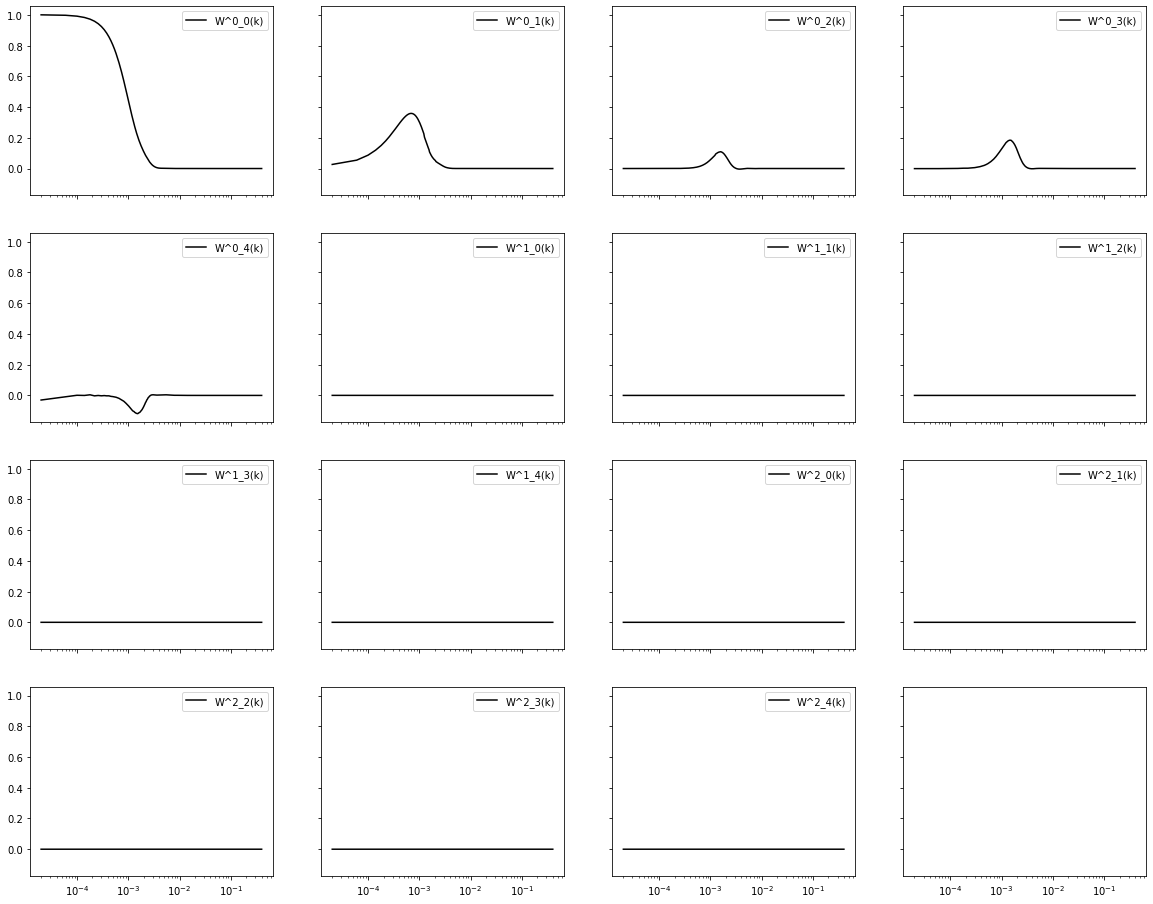

In [44]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 16), sharex=True, sharey=True)
ax = ax.flatten()

w_dicts = {}
for i, j in enumerate(range(2, 17)):
    k = d[:, 0]
    w = d[:, j]
    w_dicts[tlb[i]] = w
    ax[i].plot(k, w, 'k-', label=tlb[i])
    ax[i].set_xscale('log')
    ax[i].legend()

In [46]:
w_r_dicts
for key_i in w_dicts.keys():
    

dict_keys(['W^0_0(k)', 'W^0_1(k)', 'W^0_2(k)', 'W^0_3(k)', 'W^0_4(k)', 'W^1_0(k)', 'W^1_1(k)', 'W^1_2(k)', 'W^1_3(k)', 'W^1_4(k)', 'W^2_0(k)', 'W^2_1(k)', 'W^2_2(k)', 'W^2_3(k)', 'W^2_4(k)'])

In [47]:
import mcfit

In [55]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

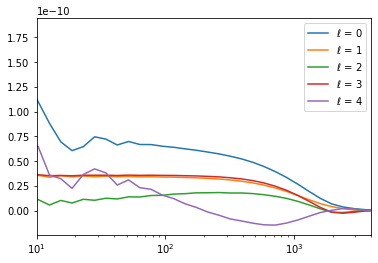

In [75]:
Klog = np.logspace(np.log10(k.min()), np.log10(k.max()))
for l in [0, 1, 2, 3, 4]:
    wius = IUS(k, w_dicts['W^0_%d(k)'%l])
    r, wr = mcfit.P2xi(Klog)(wius(Klog))
    plt.plot(r, wr, label=r'$\ell$ = %d'%l)
plt.xscale('log')
plt.xlim(10, 4e3)
plt.legend()

In [61]:
Klog.size, wius(Klog).size

(50, 50)

In [68]:
r, wr = mcfit.P2xi(Klog)(wius(Klog))

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/mcfit/mcfit.py:125: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/mcfit/mcfit.py:219: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


(10, 4000.0)

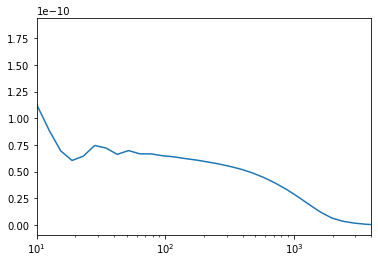

In [71]:
plt.plot(r, wr)
plt.xscale('log')
plt.xlim(10, 4e3)

In [72]:
help(mcfit.P2xi)

Help on class P2xi in module mcfit.cosmology:

class P2xi(mcfit.mcfit.mcfit)
 |  Power spectrum to correlation function.
 |  
 |  Method resolution order:
 |      P2xi
 |      mcfit.mcfit.mcfit
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, k, l=0, deriv=0, q=1.5, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from mcfit.mcfit.mcfit:
 |  
 |  __call__(self, F, axis=-1, extrap=False, keeppads=False, convonly=False)
 |      Evaluate the integral.
 |      
 |      Parameters
 |      ----------
 |      F : (..., Nin, ...) array_like
 |          input function
 |      axis : int, optional
 |          axis along which to integrate
 |      extrap : {bool, 'const'} or 2-tuple, optional
 |          Method to extrapolate `F`.
 |          For a 2-tuple, the two elements are for the left and right pads,
 |          whereas a single 